
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm

from funciones_ritmo_teorico import*
from funciones_ritmo_exp import*


plt.rcParams['font.size'] = 18



In [2]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)


tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()
print(tiempo_exposicion)
print(masa_exposicion)


#Calculamos función Numero de Cuentas teorico

Ei=1
Ef=2

N_exp=numero_cuentas_exp_CL(Ei,Ef)

print(N_exp)

N_teo=np.array([numero_cuentas_teo(Ei,Ef,timeAvg,m,1,tiempo_exposicion,masa_exposicion)for m in mWs])

18263.420000000002
112.5
985193.3005967097


9.851933005967097e+05


/tmp/ipykernel_42611/3173009962.py:18: RuntimeWarning: divide by zero encountered in true_divide
  sigma_sis=N_exp/N_teo


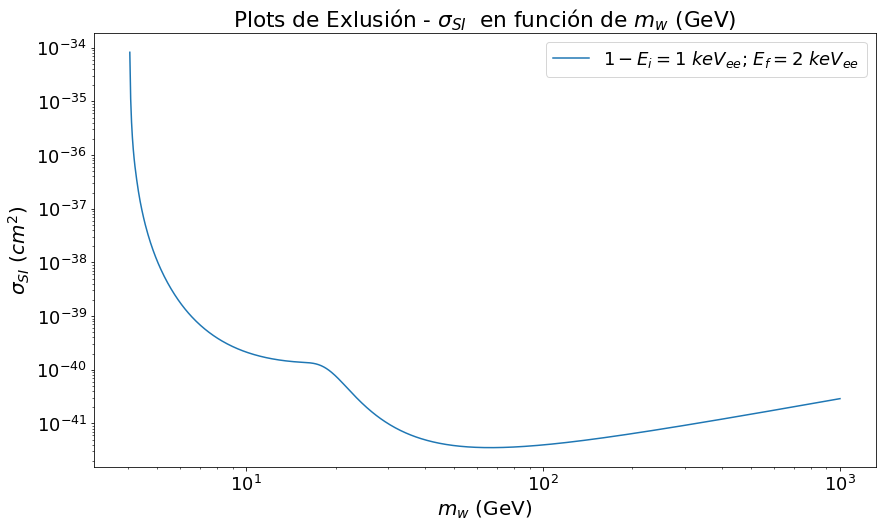

In [3]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

print(N_exp)

sigma_sis=N_exp/N_teo

ax.plot(mWs,sigma_sis,label="$1-E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")



ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

                


In [4]:
N_exp=numero_cuentas_exp_2(Ei,Ef)

print(N_exp)

NameError: name 'numero_cuentas_exp_2' is not defined